# 1x1 convolution layers의 의미

![image](https://user-images.githubusercontent.com/84653776/139356709-7b92924a-f7a3-4968-afde-086161deb693.png)

## 결론 : 입력된 전체 depth에 대한 내적을 수행
* 5x5 처럼 공간적인 정보는 사용하지 않지만 모든 depth만큼 연산 
> * 계산 과정 : 56 x 56 x 64 의 입력 , 32개의 convolution layer , 56 x 56 x 32 의 출력

# Torch로 구현된 convolution layer의 예제

![image](https://user-images.githubusercontent.com/84653776/139357047-8218f109-d867-4619-abf8-27e4433f11a9.png)

# 다른 프레임워크인 Caffe

![image](https://user-images.githubusercontent.com/84653776/139357264-5eba44bc-025c-4d13-b922-dab051ec3c25.png)

## Q : stride 를 선택하는데 가질 수 있는 직관
* 파라미터의 수, 모델 사이즈, 오버피팅과 같은 것들에는 다양한 trade-off가 있습니다.<br/> trade-off는 stride를 몇으로 할지를 결정할때 고려해야하는 문제입니다.
> * stride 를 크게 하면 출력은 작아진다. 이미지를 다운샘플링 하는것은 Pooling과 비슷하지만 확실히 다르고, 더 좋은 성능을 보이기도 합니다.<br/> Pooling처럼 다운 샘플링 하는 동일한 효과를 얻으면서 더 좋은 성능을 낼 수도 있다.
> * activation map을 줄이는 것은 추후 모델의 파라미터의 개수에도 영향을 준다. <br/>ex) Conv layer의 마지막에 FC layer가 있을 수 있습니다.
>> * FC layer는 Conv출력 모두와 연결되어 있다. Conv의 출력이 작을수록 FC layer에서 필요한 파라미터의 개수가 줄어듭니다.

# Brain Neuron 관점에서 보는 Conv layer

![image](https://user-images.githubusercontent.com/84653776/139359028-e2a47468-634f-479d-a95a-6bf08d287917.png)

### spatial structure를 유지한 채로 layer의 출력인 activation map을 만드는 것입니다.
* Conv layer를 보면 전체 이미지의 특정 위치에서 필터를 가지고 내적을 수행했습니다.  그러면 하나의 값을 얻게 됩니다.<br/> 이는 오른쪽 그림의 내적과 같은 아이디어입니다.
* 하지만 뉴런과 가장 큰 차이점은 Conv처럼 슬라이딩을 하는게 아니라 특정 부분에만 연결되어있다. 이것을 Local connectivity라고 하고 우리의 뉴런은 Local connectivity를 가지고 있습니다.
> * 하나의 뉴런은 한 부분만 처리를 하고 그런 뉴런들이 모여 전체 이미지를 처리합니다.

# 중요한 용어를 한번에 정리하겠습니다.

![image](https://user-images.githubusercontent.com/84653776/139360184-0ba166bb-df18-40e6-bbdc-a6700174ce19.png)

* 5 x 5 filter가 있다고 가정해 봅시다. 한 뉴런의 receptive field가 5 x 5다 라고 할수 있습니다.
> * receptive field : 한 뉴런이 한번에 수용할 수 있는 영역 (자주 등장!)
## 이제 출력값을 보면 아래의 파란색 Volume 처럼 생길 것입니다.

![image](https://user-images.githubusercontent.com/84653776/139360638-01374f70-1fba-4db2-a2c5-b9dc5bb82b2c.png)

* 5 x 5 필터를 사용했기 때문에 크기는 28 x 28 x (필터의 개수)가 될것 입니다.
* 한 점을 찍어 depth의 방향으로 바라보겠습니다. <br/> 그러면 5개의 점이 있고, 이 점들은 정확하게 같은 지역에서 추출된 서로 다른 특징이라고 할수 있습니다.
>* 이 의미는 각 필터들은 같은 지역을 돌더라도 서로 다른 특징을 뽑아낸다고 볼수 있습니다.

# FC layer 복습

![image](https://user-images.githubusercontent.com/84653776/139361432-8fffed81-3c55-4789-b3e4-aebf1d4cb555.png)

* FC layer 라면 32 x 32 x 3 의 이미지를 다 펴서 게산할 것입니다.

## Q : layer에서 filter가 하는 일이 symmetric입니까?
* Yes 필터의 연산은 모두 동일

# CNN에 들어가는 다른 layer를 살펴 보겠습니다.

![image](https://user-images.githubusercontent.com/84653776/139362576-89f10852-6b13-4717-b7a6-a5d0376c640e.png)

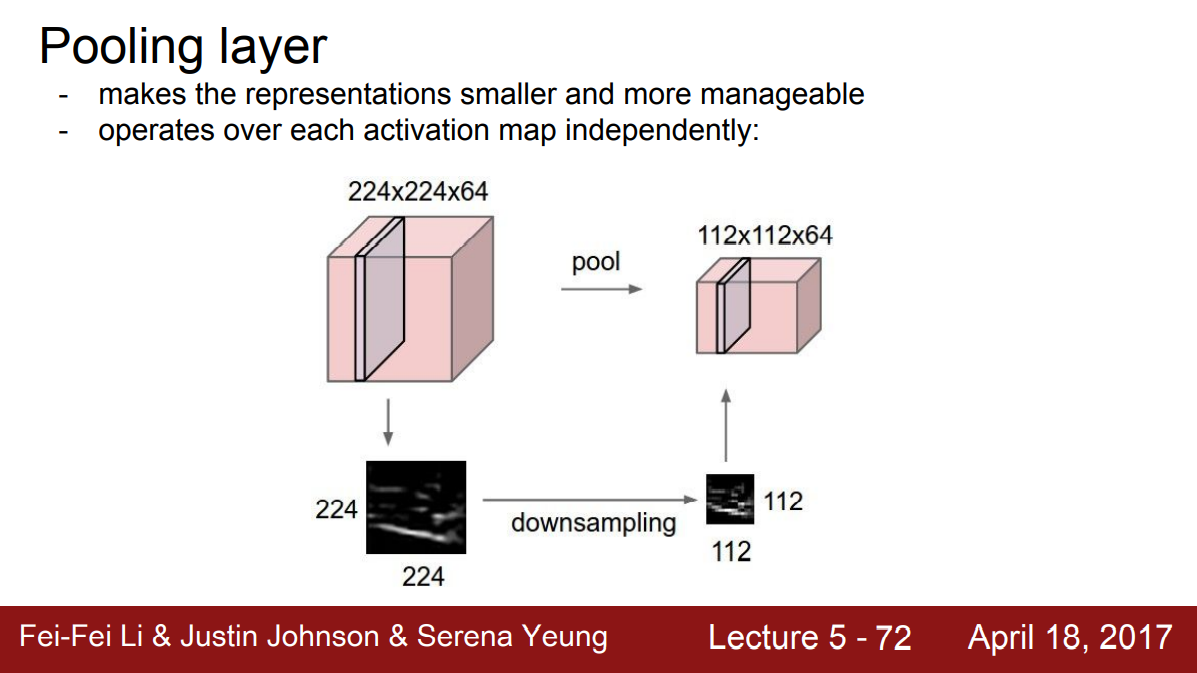

* 이미지를 다운샘플링 해주고 중요한 점은 depth에 영향을 주지 않습니다.
* Pooling layer는 representation을 더 작고 관리하기 쉽게 만들어 줍니다.
> * 파라미터의 수도 줄고 일종의 공간적인 불변성을 얻을 수 있습니다.

![image](https://user-images.githubusercontent.com/84653776/139364057-d5b99d55-9ea0-4f95-9910-73ff71d96f43.png)

* 가장 일반적인 pooling 은 max pooling입니다.

![image](https://user-images.githubusercontent.com/84653776/139363665-d865feef-70ff-402c-a0ce-332ba79c8c48.png)

* Pooling에도 필터 크기를 정할 수 있으며, 이는 얼마만큼의 영역을 한번에 묶을지 결정하는 것입니다.

## Q1 : Pooling을 할때 겹치지 않는것이 일반적입니까?
* Yes, 다운 샘플링이 목적이기 때문에 영역을 나눠 값을 뽑기 때문입니다.

## Q2 : Max Pooling 이 Average Pooling보다 좋은 이유는 무엇입니까?
* 직관적으로 설명하자면 우리가 다루는 값들은 뉴런이 얼마나 활성화 되었는지 나타내는 값들입니다. <br/> 즉, 이 필터가 각 위치에서 얼마나 활성화 되었는지 입니다. <br/> max pooling은 그 지역이 어디든, 어떤 신호에 대해 "얼마나" 그 필터가 활성화 되었는지 알려준다고 볼수 있습니다.<br/> "인식"에 대해 생각해 보면 그 값이 어디에 있냐보다 얼마나 큰지가 더 중요한 것입니다. 

## Q3 : Pooling이나 Conv의 stride나 똑같지 않습니까?
* Yes, 요즘은 다운샘플링 할때 pooling보다 stride를 많이 쓰는 추세입니다.(2017년 강의 이므로 트렌드 답변에 대해서는 알아 보아야 합니다.)

# Pooling layer

![image](https://user-images.githubusercontent.com/84653776/139365923-383e052d-1d48-4cf6-a1c9-706530a26386.png)

### Pooling layer에는 몇가지 Design Choice가 있습니다.
* W(WIdth), H(Height), D(Depth)를 통해 Filter size를 정할수 있습니다. 여기에 추가로 stride까지 정해주면 Conv layer를 사용했던 수식을 그대로 이용하여 Design Choice를 할수 있습니다.

### 일반적으로 padding을 하지 않습니다.
* 다운샘플링 하고 싶고 Conv처럼 코너값을 계산하지 못하는 경우도 없기 때문입니다.

![image](https://user-images.githubusercontent.com/84653776/139366410-0d43cbf8-5a53-49bd-a703-bd0bef67efde.png)

* 마지막 Conv layer의 출력값은 3차원 볼륨으로 이루어집니다. 이 값들을 전부 펴서 1차원 벡터로 만들어 FC layer의 입력으로 사용합니다.<br/>그렇게 되면 Conv Net의 모든 출력을 서로 연결하게 되는것입니다.
* 마지막 layer부터는 전부다 하나로 통합시키고 최종적인 추론을 하여 Score 값이 출력되기 때문에 spatial structure를 신경쓰지 않아도 됩니다.

## Q1 : 각각의 열(col)은 어떻게 해석해야 합니까?
* 여기 보이는것은 Activation map입니다.

## Q2 : 그림만 보면 정보가 작아 보이는데 어떻게 분류할수 있습니까?
* 맨 오른쪽 POOL의 출력값은 전체 네트워크를 통과한 집약체라고 할 수 있습니다. 그러므로 우리가 만든 계층구조의 최상위이며 <br/> 실제로 Higher level concept를 표현하고 있는것입니다.
* 예전에 Hubel and Wiesel의 예를 보았고, 이를 기반으로 필터를 계층적으로 쌓아 올렸습니다. 최하위 계층에서는 edges와 같은 단순한 구조를 찾아냅니다. 즉, 위 그림에서 첫번째 열(col)이 의미하는것은 '각 자리에 edges같은 것들이 얼마나 존재하는지' 입니다.<br/>그리고 지나면 지날수록 더 복잡한 것들은 찾아냅니다. 두번째 레이어에서는 corner(edges보다 복잡함)같은 것이 얼마나 있는지 보여줍니다.<br/>각 그림은 자동차가 아니고 edge maps같은 것들이라고 보시면 됩니다. 이런 edge maps들로 더 복잡한 것들을 추론하며 쌓아갑니다.<br/>마지막 pooling layer를 거치기 전까지 각 값들은 각 필터가 가진 templete이 얼마나 활성화되었는지 표현합니다. 그리고 이런 정보를 가지고 FC layer를 거치면 정보들을 모아 클래스 스코어를 계산하게 됩니다.
### 결론은 각 값들이 의미하는것은 필터의 templete이 얼마나 활성화 되었는가를 의미합니다.

## Q3 : classification 문제를 푸는데 pooling을 얼마나 해야 할까요?
* 직접 해보셔야 됩니다.

# cs231n 강의를 만든 갓파사의 demo 작품입니다.

![image](https://user-images.githubusercontent.com/84653776/139374834-317577a2-7136-401b-a163-9a2d79b33508.png)

* 위 데모는 CIFAR-10을 학습시키고 10개의 클래스를 가지고 있습니다.
* 장점으로는 실제로 Filter와 Activation map이 어떻게 생겼는지 볼 수 있습니다.
* layer가 진행될수록 각각 무슨일을 하는지 해석하기 점점 힘들어지지만 흐름만 살펴 봐도 도움이 될것이라고 합니다.